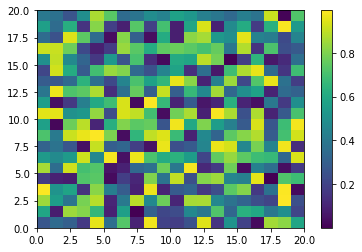

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cmath


# Fixing random state for reproducibility
np.random.seed(1968011)

fig, axs = plt.subplots(1, 1)
cmaps = 'viridis'
for col in range(1):
    for row in range(1):
        ax = axs
        pcm = ax.pcolormesh(np.random.random((20, 20)),
                            cmap=cmaps)
        fig.colorbar(pcm, ax=ax)
plt.show()